In [83]:
from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt
import time

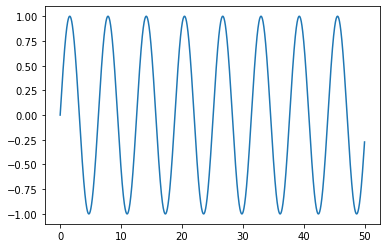

In [106]:
t = np.arange(0, 50, 0.01)
amplitude = np.sin(t)
n = np.random.normal(scale=0.1, size=t.size)
pred_sin = np.sin(t) + n
plt.plot(t, amplitude)

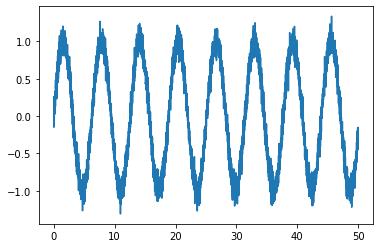

In [107]:
plt.plot(t, pred_sin)

In [111]:
grids = np.asarray(np.array_split(t, 10))
sins = np.asarray(np.array_split(amplitude, 10))
preds = np.asarray(np.array_split(pred_sin, 10))

In [112]:
extra_grid = np.arange(50, 60, 0.01)
n = np.random.normal(scale=0.1, size=extra_grid.size)
extra_pred = np.asarray(np.array_split(np.sin(extra_grid) + n, 2))
# extra_grid = np.asarray(np.array_split(extra_grid, 2))
extra_sin = np.asarray(np.array_split(np.full(extra_grid.shape, sins[-1][-1]), 2))
extra_grid = np.asarray(np.array_split(extra_grid, 2))

extra_grid.shape, extra_sin.shape, extra_pred.shape

((2, 500), (2, 500), (2, 500))

In [113]:
np.full(extra_grid.shape, sins[-1][-1]).shape

(2, 500)

In [114]:
grids.shape, sins.shape

((10, 500), (10, 500))

In [115]:
grids = np.vstack((grids, extra_grid))
sins = np.vstack((sins, extra_sin))
preds = np.vstack((preds, extra_pred))
grids.shape

(12, 500)

ANOMALY in 11-th segment


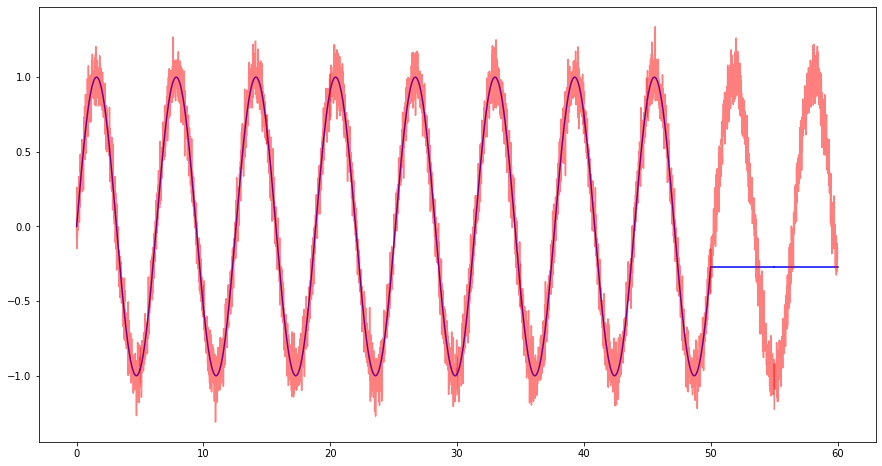

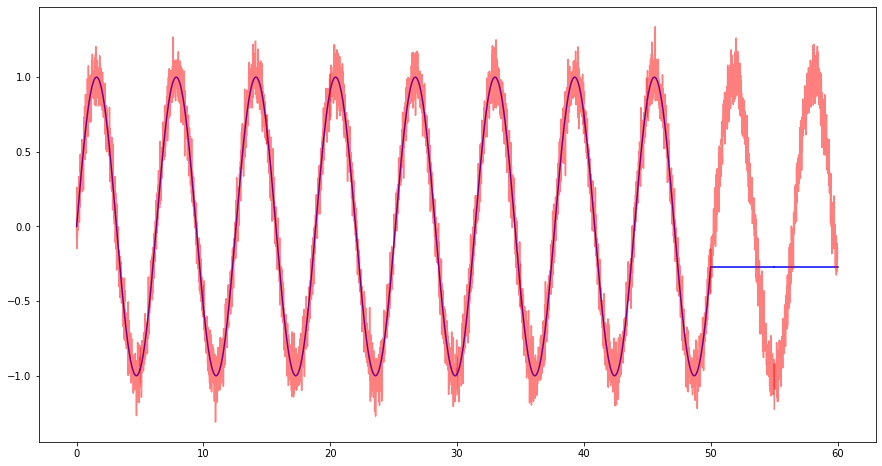

In [119]:
import time
f, ax = plt.subplots(figsize=(15, 8))
for i, (grid, sin, pred) in enumerate(zip(grids, sins, preds)):
    time.sleep(0.3)
    ax.plot(grid, sin, c='b')
    # time.sleep(1)
    clear_output(wait=True)
    ax.plot(grid, pred, alpha=0.5, c='r')
    # check condition (may be changed)
    if (np.std(sin) == 0):
        print(f'ANOMALY in {i}-th segment')
    display(f)